In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
#print("Hyun bin")

In [46]:
df = pd.read_excel("loan_dataset.xlsx")
print(df.shape)
df.head(10)

(255246, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [47]:
df.info()
print("\nMissing values per column:\n", df.isna().sum())
print("\nTarget distribution (Default):\n", df['Default'].value_counts(normalize=True))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255246 entries, 0 to 255245
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255246 non-null  object 
 1   Age             255246 non-null  int64  
 2   Income          255246 non-null  int64  
 3   LoanAmount      255246 non-null  int64  
 4   CreditScore     255246 non-null  int64  
 5   MonthsEmployed  255246 non-null  int64  
 6   NumCreditLines  255246 non-null  int64  
 7   InterestRate    255246 non-null  float64
 8   LoanTerm        255246 non-null  int64  
 9   DTIRatio        255246 non-null  float64
 10  Education       255246 non-null  object 
 11  EmploymentType  255246 non-null  object 
 12  MaritalStatus   255246 non-null  object 
 13  HasMortgage     255246 non-null  object 
 14  HasDependents   255246 non-null  object 
 15  LoanPurpose     255246 non-null  object 
 16  HasCoSigner     255246 non-null  object 
 17  Default   

In [48]:
df = df.drop(columns=['LoanID'])
df.columns = [c.strip() for c in df.columns]
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [49]:
df.dtypes

age                 int64
income              int64
loanamount          int64
creditscore         int64
monthsemployed      int64
numcreditlines      int64
interestrate      float64
loanterm            int64
dtiratio          float64
education          object
employmenttype     object
maritalstatus      object
hasmortgage        object
hasdependents      object
loanpurpose        object
hascosigner        object
default             int64
dtype: object

In [50]:
(df[['age','income','loanamount','creditscore','monthsemployed']] < 0).sum()

age               0
income            0
loanamount        0
creditscore       0
monthsemployed    0
dtype: int64

In [56]:
for col in df.select_dtypes(include='object'):
    print(col, df[col].unique())
df['hasmortgage'] = df['hasmortgage'].str.lower()
df.head()

education ["Bachelor's" "Master's" 'High School' 'PhD']
employmenttype ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
maritalstatus ['Divorced' 'Married' 'Single']
hasmortgage ['Yes' 'No']
hasdependents ['Yes' 'No']
loanpurpose ['Other' 'Auto' 'Business' 'Home' 'Education']
hascosigner ['Yes' 'No']


,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,yes,Yes,Other,Yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,no,No,Other,Yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,yes,Yes,Auto,No,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,no,No,Business,No,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,no,Yes,Auto,No,0


In [58]:
for col in df.select_dtypes(include='object'):
    print(col, df[col].unique())
df['hasmortgage'] = df['hasmortgage'].str.lower()
df['hasdependents'] = df['hasdependents'].str.lower()
df['hascosigner'] = df['hascosigner'].str.lower()
df.head()

education ["Bachelor's" "Master's" 'High School' 'PhD']
employmenttype ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
maritalstatus ['Divorced' 'Married' 'Single']
hasmortgage ['yes' 'no']
hasdependents ['Yes' 'No']
loanpurpose ['Other' 'Auto' 'Business' 'Home' 'Education']
hascosigner ['Yes' 'No']


,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,education,employmenttype,maritalstatus,hasmortgage,hasdependents,loanpurpose,hascosigner,default
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,yes,yes,Other,yes,0
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,no,no,Other,yes,0
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,yes,yes,Auto,no,1
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,no,no,Business,no,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,no,yes,Auto,no,0


In [60]:
#Binary mapping the numerical columns
binary_map = {'yes': 1, 'no': 0}
df['hasmortgage'] = df['hasmortgage'].map(binary_map)
df['hasdependents'] = df['hasdependents'].map(binary_map)
df['hascosigner'] = df['hascosigner'].map(binary_map)

# One-hot encode the categorical columns
categorical_cols = ['education', 'employmenttype', 'maritalstatus', 'loanpurpose']
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print(df.head())
print("\nFinal column count:", len(df.columns))
#DONE WITH EDA

   age  income  loanamount  creditscore  monthsemployed  numcreditlines  \
0   56   85994       50587          520              80               4   
1   69   50432      124440          458              15               1   
2   46   84208      129188          451              26               3   
3   32   31713       44799          743               0               3   
4   60   20437        9139          633               8               4   

   interestrate  loanterm  dtiratio  hasmortgage  ...  education_PhD  \
0         15.23        36      0.44            1  ...          False   
1          4.81        60      0.68            0  ...          False   
2         21.17        24      0.31            1  ...          False   
3          7.07        24      0.23            0  ...          False   
4          6.51        48      0.73            0  ...          False   

   employmenttype_Part-time  employmenttype_Self-employed  \
0                     False                         Fal

In [62]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'income', 'loanamount', 'creditscore', 'monthsemployed',
                'numcreditlines', 'interestrate', 'loanterm', 'dtiratio']

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df.head()


,age,income,loanamount,creditscore,monthsemployed,numcreditlines,interestrate,loanterm,dtiratio,hasmortgage,...,education_PhD,employmenttype_Part-time,employmenttype_Self-employed,employmenttype_Unemployed,maritalstatus_Married,maritalstatus_Single,loanpurpose_Business,loanpurpose_Education,loanpurpose_Home,loanpurpose_Other
0,0.834052,0.089651,-1.086768,-0.341526,0.590504,1.341899,0.261765,-0.001515,-0.260772,1,...,False,False,False,False,False,False,False,False,False,True
1,1.701289,-0.823050,-0.044267,-0.731702,-1.285790,-1.343835,-1.308333,1.412801,0.778562,0,...,False,False,False,False,True,False,False,False,False,True
2,0.166947,0.043813,0.022755,-0.775755,-0.968263,0.446654,1.156811,-0.708674,-0.823745,1,...,False,False,False,True,False,False,False,False,False,False
3,-0.766999,-1.303474,-1.168471,1.061851,-1.718781,0.446654,-0.967793,-0.708674,-1.170190,0,...,False,False,False,False,True,False,True,False,False,False
4,1.100894,-1.592874,-1.671843,0.369602,-1.487853,1.341899,-1.052175,0.705643,0.995089,0,...,False,False,False,True,False,False,False,False,False,False


In [66]:
# Separate features (X) and target (y)
X = df.drop('default', axis=1)  # assuming 'loan_status' is your target column
y = df['default']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (204196, 24)
Testing set shape: (51050, 24)


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Predictions
y_pred = log_reg.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8852889324191968

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45121
           1       0.61      0.03      0.06      5929

    accuracy                           0.89     51050
   macro avg       0.75      0.52      0.50     51050
weighted avg       0.85      0.89      0.84     51050


Confusion Matrix:
 [[44991   130]
 [ 5726   203]]


In [70]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the model
rf_model = RandomForestClassifier(
    n_estimators=200,      # number of trees
    max_depth=None,        # let trees grow fully
    random_state=42,
    class_weight='balanced'  # helps with imbalance
)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.8846425073457395

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45121
           1       0.69      0.01      0.02      5929

    accuracy                           0.88     51050
   macro avg       0.79      0.51      0.48     51050
weighted avg       0.86      0.88      0.83     51050


Confusion Matrix:
 [[45089    32]
 [ 5857    72]]


Accuracy: 0.8861508325171401


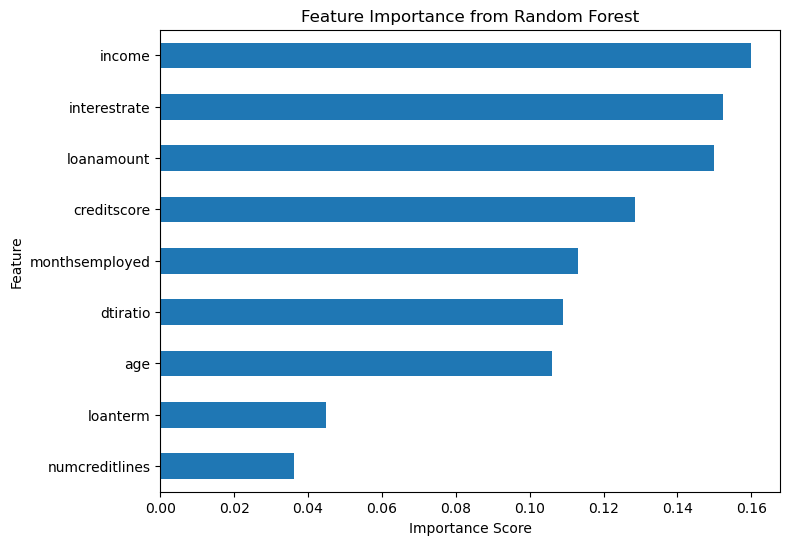

In [76]:
# Select numerical columns
num_features = ['age', 'income', 'loanamount', 'creditscore', 'monthsemployed',
                'numcreditlines', 'interestrate', 'loanterm', 'dtiratio']

X = df[num_features]
y = df["default"]  # assuming 0 = no default, 1 = default

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=num_features)
feat_importances = feat_importances.sort_values(ascending=True)

# Plot
plt.figure(figsize=(8,6))
feat_importances.plot(kind='barh')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


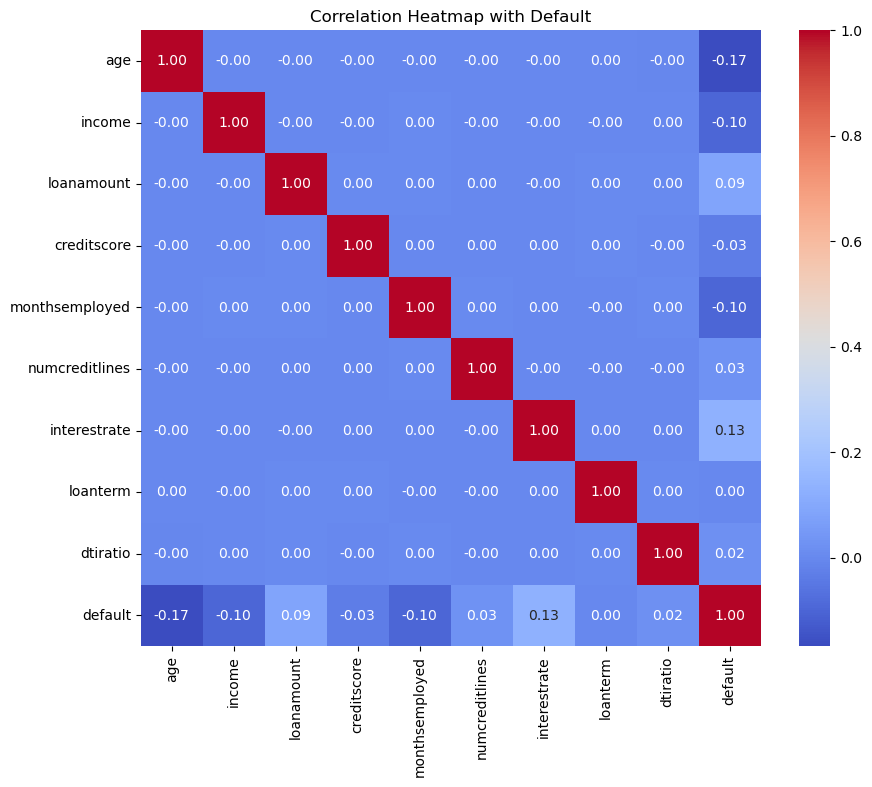

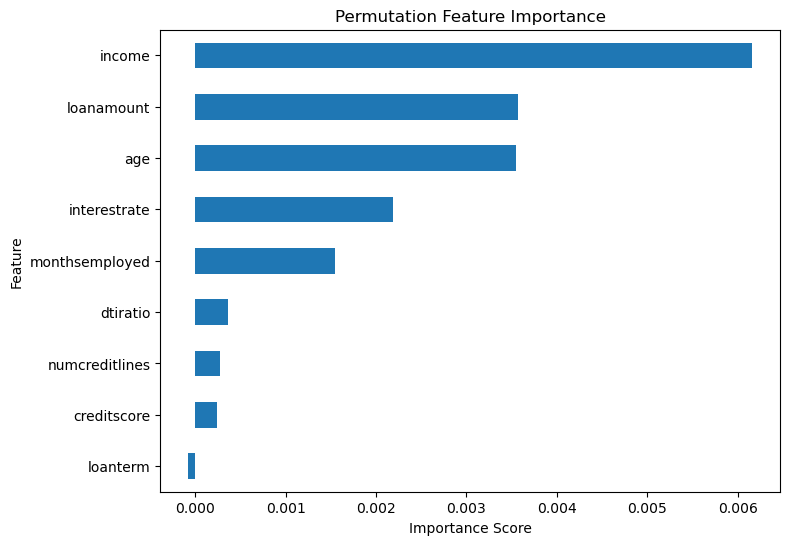

Permutation importance scores:
 loanterm         -0.000076
creditscore       0.000237
numcreditlines    0.000268
dtiratio          0.000362
monthsemployed    0.001546
interestrate      0.002190
age               0.003546
loanamount        0.003571
income            0.006161
dtype: float64


In [80]:
from sklearn.inspection import permutation_importance
import seaborn as sns

plt.figure(figsize=(10,8))
corr = df[num_features + ['default']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap with Default")
plt.show()

perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

perm_feat_importances = pd.Series(perm_importance.importances_mean, index=num_features)
perm_feat_importances = perm_feat_importances.sort_values(ascending=True)

plt.figure(figsize=(8,6))
perm_feat_importances.plot(kind='barh')
plt.title("Permutation Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

print("Permutation importance scores:\n", perm_feat_importances)


Accuracy: 0.8866209598432909

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45160
           1       0.64      0.04      0.07      5890

    accuracy                           0.89     51050
   macro avg       0.76      0.52      0.51     51050
weighted avg       0.86      0.89      0.84     51050


Confusion Matrix:
 [[45030   130]
 [ 5658   232]]


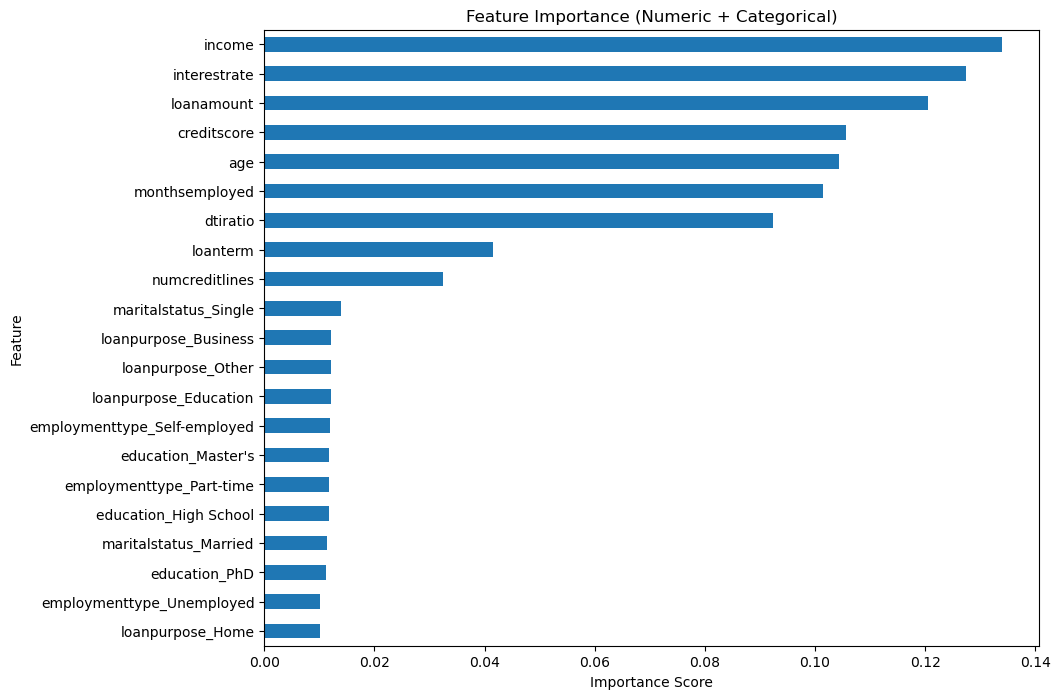

In [82]:


# All features: numeric + one-hot encoded
cat_features = [col for col in df.columns if '_' in col]  # your one-hot columns
all_features = num_features + cat_features

X = df[all_features]
y = df['default']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
rf_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_final.fit(X_train, y_train)

# Predictions
y_pred = rf_final.predict(X_test)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance
feat_importances = pd.Series(rf_final.feature_importances_, index=all_features)
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')
plt.title("Feature Importance (Numeric + Categorical)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Accuracy: 0.8241527913809991

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.88      0.90     45160
           1       0.31      0.41      0.35      5890

    accuracy                           0.82     51050
   macro avg       0.61      0.64      0.62     51050
weighted avg       0.85      0.82      0.84     51050


Confusion Matrix:
 [[39655  5505]
 [ 3472  2418]]


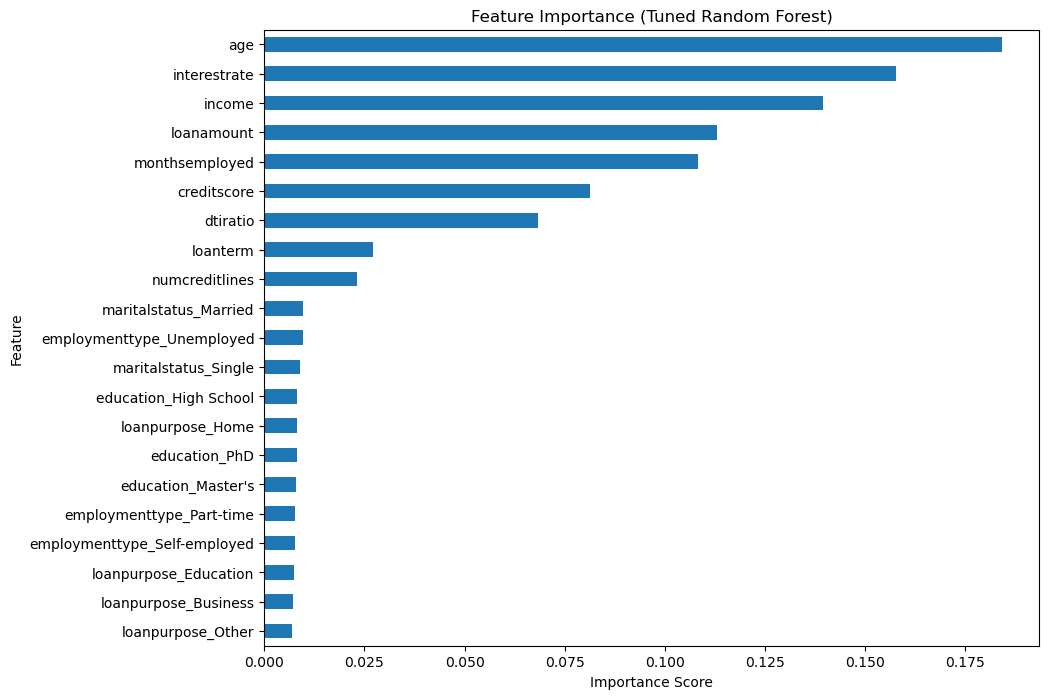

In [84]:
# 1️⃣ Features: numeric + one-hot encoded
cat_features = [col for col in df.columns if '_' in col]  # your one-hot columns
num_features = ['age', 'income', 'loanamount', 'creditscore', 'monthsemployed',
                'numcreditlines', 'interestrate', 'loanterm', 'dtiratio']
all_features = num_features + cat_features

X = df[all_features]
y = df['default']

# 2️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3️⃣ Random Forest with class weights + hyperparameter tuning
rf_tuned = RandomForestClassifier(
    n_estimators=300,        # more trees for stability
    max_depth=15,            # limit depth to prevent overfitting
    min_samples_leaf=5,      # min samples per leaf
    max_features='sqrt',     # sqrt of features at each split
    random_state=42,
    class_weight='balanced'  # handle class imbalance
)

# 4️⃣ Train model
rf_tuned.fit(X_train, y_train)

# 5️⃣ Predictions
y_pred = rf_tuned.predict(X_test)

# 6️⃣ Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 7️⃣ Feature Importance
feat_importances = pd.Series(rf_tuned.feature_importances_, index=all_features)
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')
plt.title("Feature Importance (Tuned Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


Accuracy: 0.7762781586679726

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.81      0.86     45160
           1       0.26      0.52      0.35      5890

    accuracy                           0.78     51050
   macro avg       0.60      0.67      0.61     51050
weighted avg       0.85      0.78      0.81     51050


Confusion Matrix:
 [[36555  8605]
 [ 2816  3074]]


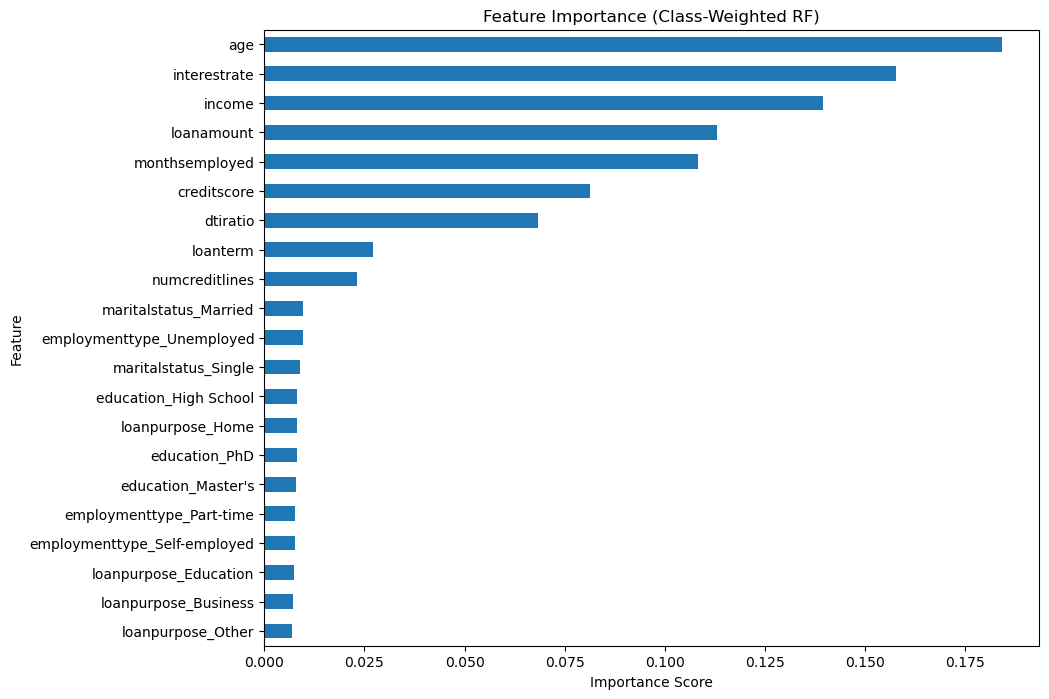

In [104]:


# Predict probabilities
y_probs = rf_weighted.predict_proba(X_test)[:,1]  # probability of class 1 (default)

# Tune threshold
threshold = 0.44  # adjust between 0.3–0.45 to balance recall vs accuracy
y_pred_thresh = (y_probs >= threshold).astype(int)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))

# Feature Importance
feat_importances = pd.Series(rf_weighted.feature_importances_, index=all_features)
feat_importances = feat_importances.sort_values(ascending=True)

plt.figure(figsize=(10,8))
feat_importances.plot(kind='barh')
plt.title("Feature Importance (Class-Weighted RF)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [120]:
import xgboost as xgb

# Prepare DMatrix (XGBoost format)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=(len(y_train[y_train==0]) / len(y_train[y_train==1])), # handles class imbalance
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:,1]  # for threshold tuning

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:24:26] WARNING: /var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_abwcuua5oq/croot/xgboost-split_1749630928197/work/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.7095592556317336

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.72      0.81     45160
           1       0.23      0.65      0.34      5890

    accuracy                           0.71     51050
   macro avg       0.58      0.68      0.58     51050
weighted avg       0.86      0.71      0.76     51050


Confusion Matrix:
 [[32419 12741]
 [ 2086  3804]]


In [122]:
import numpy as np

# Choose a new threshold
threshold = 0.44
y_pred_thresh = (y_prob >= threshold).astype(int)

# Evaluate
print("Accuracy (threshold={}):".format(threshold), accuracy_score(y_test, y_pred_thresh))
print("\nClassification Report:\n", classification_report(y_test, y_pred_thresh))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_thresh))


Accuracy (threshold=0.44): 0.6439764936336925

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.63      0.76     45160
           1       0.21      0.73      0.32      5890

    accuracy                           0.64     51050
   macro avg       0.58      0.68      0.54     51050
weighted avg       0.86      0.64      0.71     51050


Confusion Matrix:
 [[28594 16566]
 [ 1609  4281]]


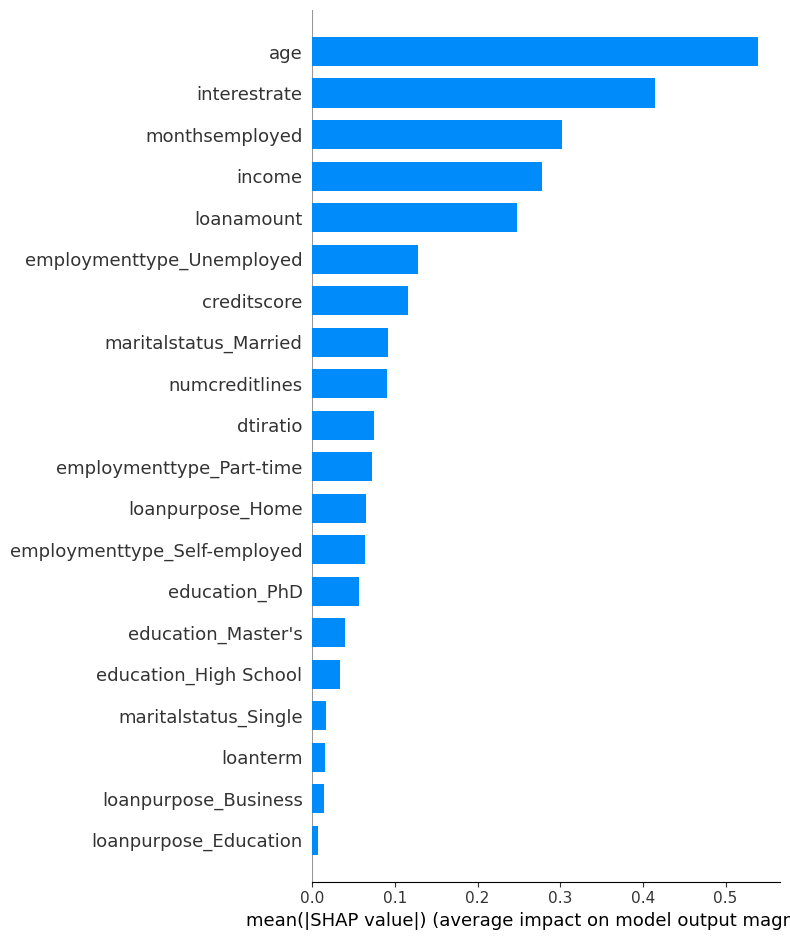

In [128]:
import shap

# Initialize SHAP explainer
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

# Summary plot (feature importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")

# Optional: force plot for a single prediction
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.6/547.6 kB 3.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.
